This notebook is for experimenting with the affects of augmenting the training data.

In [1]:
#imports 
import os, shutil
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras import regularizers
import seaborn as sns
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

In [2]:
# strings of directories for the different data
train_images_dir = 'C:/Users/User/Desktop/hand_images/train'
test_images_dir = 'C:/Users/User/Desktop/hand_images/test'

In [3]:
# here I set 3 global variables: target size, batch size and epochs
# I do this because these variables are used quite often, so I wanted to be able to change it one place 
# and have it change everywhere in the rest of the notebook.
global_target_size = (127,127) # The size of the images
global_batch_size = 32 # The size of each batch being fed to the models
global_epochs = 250 # How many times each model should run through the entire dataset

In [4]:
train_val_generator = ImageDataGenerator(rescale=1./255,
                                         validation_split = .25,
                                        horizontal_flip = True,
                                    zoom_range = .05,
                                        height_shift_range = .1)

In [5]:
train_data = train_val_generator.flow_from_directory(train_images_dir,  
                                                     target_size = global_target_size,
                                                     subset='training',
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = True,
                                                    seed = 42)

Found 582 images belonging to 2 classes.


In [6]:
val_generator_aug = ImageDataGenerator(rescale=1./255,
                                         validation_split = .25)

In [7]:
val_data = val_generator_aug.flow_from_directory(train_images_dir,  
                                                     target_size = global_target_size,
                                                     subset='validation',
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = True,
                                                    seed = 42)

Found 194 images belonging to 2 classes.


In [8]:
model18 = models.Sequential()

# Stack 1
model18.add(layers.Conv2D(filters = 64,
                         kernel_size=(3,3),
                         activation='relu',
                         input_shape = (global_target_size[0],global_target_size[0], 3),
                         padding = 'same'
                        ))
model18.add(layers.MaxPooling2D(pool_size = (4,4),
                         padding = 'same'))

# Dropout Layer 1
model18.add(layers.Dropout(0.1))

# Stack 2
model18.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Dropout Layer 2
model18.add(layers.Dropout(0.1))

# Stack 3
model18.add(layers.Conv2D(64, (4,4), activation='relu'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Stack 4
model18.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model18.add(layers.MaxPooling2D((2, 2),
                                padding = 'same'))

# Dropout Layer 3
model18.add(layers.Dropout(0.1))

# Stack 5
model18.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Dropout Layer 4
model18.add(layers.Dropout(0.1))

# Stack 5
model18.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Flattening layer
model18.add(layers.Flatten())

# Dense layer 1
model18.add(layers.Dense(64, activation='relu'))

# Dense layer 2 - output layer
model18.add(layers.Dense(1, activation='sigmoid'))

model18.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['acc'])

In [9]:
model18_history = model18.fit(train_data,
                    epochs=global_epochs,
                    validation_data = val_data
                   )

Epoch 1/250
19/19 [==============================] - 35s 2s/step - loss: 0.7116 - acc: 0.5052 - val_loss: 0.6929 - val_acc: 0.5155
Epoch 2/250
19/19 [==============================] - 27s 1s/step - loss: 0.6930 - acc: 0.5155 - val_loss: 0.6929 - val_acc: 0.5155
Epoch 3/250
19/19 [==============================] - 29s 2s/step - loss: 0.6930 - acc: 0.5155 - val_loss: 0.6922 - val_acc: 0.5155
Epoch 4/250
19/19 [==============================] - 30s 2s/step - loss: 0.6932 - acc: 0.5155 - val_loss: 0.6919 - val_acc: 0.5155
Epoch 5/250
19/19 [==============================] - 29s 2s/step - loss: 0.6908 - acc: 0.5412 - val_loss: 0.6630 - val_acc: 0.8144
Epoch 6/250
19/19 [==============================] - 32s 2s/step - loss: 0.6701 - acc: 0.6100 - val_loss: 0.6859 - val_acc: 0.5309
Epoch 7/250
19/19 [==============================] - 29s 2s/step - loss: 0.6757 - acc: 0.5704 - val_loss: 0.4985 - val_acc: 0.7938
Epoch 8/250
19/19 [==============================] - 28s 1s/step - loss: 0.6054 - a

19/19 [==============================] - 24s 1s/step - loss: 0.0664 - acc: 0.9828 - val_loss: 0.5929 - val_acc: 0.8660
Epoch 64/250
19/19 [==============================] - 24s 1s/step - loss: 0.0577 - acc: 0.9794 - val_loss: 0.5133 - val_acc: 0.8505
Epoch 65/250
19/19 [==============================] - 25s 1s/step - loss: 0.0530 - acc: 0.9794 - val_loss: 0.5758 - val_acc: 0.8608
Epoch 66/250
19/19 [==============================] - 24s 1s/step - loss: 0.0809 - acc: 0.9656 - val_loss: 0.5016 - val_acc: 0.8505
Epoch 67/250
19/19 [==============================] - 25s 1s/step - loss: 0.0685 - acc: 0.9794 - val_loss: 0.5583 - val_acc: 0.8608
Epoch 68/250
19/19 [==============================] - 24s 1s/step - loss: 0.0876 - acc: 0.9622 - val_loss: 0.5612 - val_acc: 0.8763
Epoch 69/250
19/19 [==============================] - 24s 1s/step - loss: 0.0884 - acc: 0.9639 - val_loss: 0.4947 - val_acc: 0.8763
Epoch 70/250
19/19 [==============================] - 24s 1s/step - loss: 0.0631 - acc: 0

Epoch 125/250
19/19 [==============================] - 25s 1s/step - loss: 0.0336 - acc: 0.9897 - val_loss: 0.4955 - val_acc: 0.8660
Epoch 126/250
19/19 [==============================] - 24s 1s/step - loss: 0.0290 - acc: 0.9897 - val_loss: 0.5699 - val_acc: 0.8505
Epoch 127/250
19/19 [==============================] - 25s 1s/step - loss: 0.0167 - acc: 0.9948 - val_loss: 0.6309 - val_acc: 0.8557
Epoch 128/250
19/19 [==============================] - 32s 2s/step - loss: 0.0188 - acc: 0.9914 - val_loss: 0.5970 - val_acc: 0.8866
Epoch 129/250
19/19 [==============================] - 27s 1s/step - loss: 0.0329 - acc: 0.9897 - val_loss: 0.6524 - val_acc: 0.8711
Epoch 130/250
19/19 [==============================] - 26s 1s/step - loss: 0.0785 - acc: 0.9759 - val_loss: 0.6443 - val_acc: 0.8608
Epoch 131/250
19/19 [==============================] - 27s 1s/step - loss: 0.1280 - acc: 0.9622 - val_loss: 0.4328 - val_acc: 0.8814
Epoch 132/250
19/19 [==============================] - 27s 1s/step - 

19/19 [==============================] - 38s 2s/step - loss: 0.0121 - acc: 0.9931 - val_loss: 0.5612 - val_acc: 0.9124
Epoch 187/250
19/19 [==============================] - 27s 1s/step - loss: 0.0328 - acc: 0.9897 - val_loss: 0.8944 - val_acc: 0.8247
Epoch 188/250
19/19 [==============================] - 28s 1s/step - loss: 0.0233 - acc: 0.9914 - val_loss: 0.7629 - val_acc: 0.8866
Epoch 189/250
19/19 [==============================] - 25s 1s/step - loss: 0.0165 - acc: 0.9948 - val_loss: 0.8506 - val_acc: 0.8763
Epoch 190/250
19/19 [==============================] - 28s 1s/step - loss: 0.0300 - acc: 0.9914 - val_loss: 0.8256 - val_acc: 0.8711
Epoch 191/250
19/19 [==============================] - 29s 2s/step - loss: 0.0911 - acc: 0.9777 - val_loss: 0.5437 - val_acc: 0.8711
Epoch 192/250
19/19 [==============================] - 28s 1s/step - loss: 0.0382 - acc: 0.9897 - val_loss: 0.5652 - val_acc: 0.8608
Epoch 193/250
19/19 [==============================] - 26s 1s/step - loss: 0.0309 -

19/19 [==============================] - 25s 1s/step - loss: 0.0053 - acc: 0.9966 - val_loss: 1.0960 - val_acc: 0.8711
Epoch 248/250
19/19 [==============================] - 24s 1s/step - loss: 0.0093 - acc: 0.9948 - val_loss: 0.7201 - val_acc: 0.8505
Epoch 249/250
19/19 [==============================] - 24s 1s/step - loss: 0.0614 - acc: 0.9828 - val_loss: 0.7222 - val_acc: 0.8351
Epoch 250/250
19/19 [==============================] - 24s 1s/step - loss: 0.0439 - acc: 0.9863 - val_loss: 0.5420 - val_acc: 0.8402


In [10]:
model18.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        3

In [11]:
model_18_train_results = model18.evaluate(train_data)
model_18_train_results

model_18_val_results = model18.evaluate(val_data)
model_18_val_results

7/7 [==============================] - 3s 405ms/step - loss: 0.5420 - acc: 0.8402


[0.5420101881027222, 0.8402062058448792]

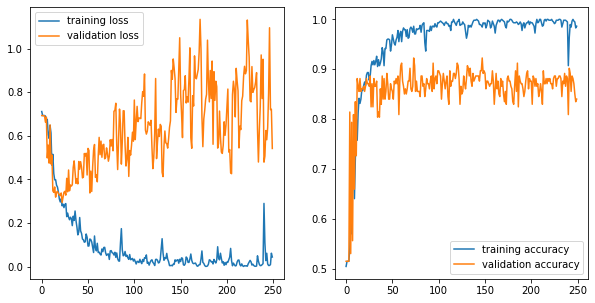

In [12]:
# visualizing loss and accuracy per epoch
model18_train_loss = model18_history.history['loss']
model18_train_acc = model18_history.history['acc']
model18_val_loss = model18_history.history['val_loss']
model18_val_acc = model18_history.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(x=model18_history.epoch, y=model18_train_loss, ax=ax1, label='training loss')
sns.lineplot(x=model18_history.epoch, y=model18_train_acc, ax=ax2, label='training accuracy')

sns.lineplot(x=model18_history.epoch, y=model18_val_loss, ax=ax1, label='validation loss')
sns.lineplot(x=model18_history.epoch, y=model18_val_acc, ax=ax2, label='validation accuracy');

# Baseline

In [13]:
baseline = models.Sequential()

# stack 1
baseline.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(global_target_size[0], global_target_size[0],  3)))
baseline.add(layers.MaxPooling2D((2, 2)))

# stack 2
baseline.add(layers.Conv2D(32, (4, 4), activation='relu'))
baseline.add(layers.MaxPooling2D((2, 2)))

# stack 3
baseline.add(layers.Conv2D(64, (3, 3), activation='relu'))
baseline.add(layers.MaxPooling2D((2, 2)))

# flattening layer
baseline.add(layers.Flatten())

# Dense Layer 1 
baseline.add(layers.Dense(64, activation='relu'))

# Dense Layer 2 // output layer
baseline.add(layers.Dense(1, activation='sigmoid'))


## Compiling baseline 
baseline.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [14]:
baseline_history = baseline.fit(train_data,
                    epochs=global_epochs,
                    validation_data = val_data
                   )

Epoch 1/250
19/19 [==============================] - 26s 1s/step - loss: 0.6904 - acc: 0.5241 - val_loss: 0.6841 - val_acc: 0.5567
Epoch 2/250
19/19 [==============================] - 25s 1s/step - loss: 0.6872 - acc: 0.5584 - val_loss: 0.6808 - val_acc: 0.5876
Epoch 3/250
19/19 [==============================] - 25s 1s/step - loss: 0.6861 - acc: 0.5498 - val_loss: 0.6773 - val_acc: 0.5309
Epoch 4/250
19/19 [==============================] - 25s 1s/step - loss: 0.6818 - acc: 0.5808 - val_loss: 0.6733 - val_acc: 0.6495
Epoch 5/250
19/19 [==============================] - 25s 1s/step - loss: 0.6799 - acc: 0.5773 - val_loss: 0.6703 - val_acc: 0.6804
Epoch 6/250
19/19 [==============================] - 25s 1s/step - loss: 0.6761 - acc: 0.5962 - val_loss: 0.6634 - val_acc: 0.6289
Epoch 7/250
19/19 [==============================] - 25s 1s/step - loss: 0.6717 - acc: 0.5893 - val_loss: 0.6656 - val_acc: 0.6598
Epoch 8/250
19/19 [==============================] - 26s 1s/step - loss: 0.6570 - a

19/19 [==============================] - 26s 1s/step - loss: 0.4262 - acc: 0.8076 - val_loss: 0.4077 - val_acc: 0.7990
Epoch 64/250
19/19 [==============================] - 25s 1s/step - loss: 0.4568 - acc: 0.7887 - val_loss: 0.4532 - val_acc: 0.7577
Epoch 65/250
19/19 [==============================] - 25s 1s/step - loss: 0.4147 - acc: 0.8196 - val_loss: 0.3626 - val_acc: 0.8763
Epoch 66/250
19/19 [==============================] - 25s 1s/step - loss: 0.4153 - acc: 0.8230 - val_loss: 0.3884 - val_acc: 0.8557
Epoch 67/250
19/19 [==============================] - 25s 1s/step - loss: 0.4099 - acc: 0.8144 - val_loss: 0.3719 - val_acc: 0.8711
Epoch 68/250
19/19 [==============================] - 25s 1s/step - loss: 0.4356 - acc: 0.8058 - val_loss: 0.3908 - val_acc: 0.8299
Epoch 69/250
19/19 [==============================] - 25s 1s/step - loss: 0.4361 - acc: 0.8041 - val_loss: 0.3713 - val_acc: 0.8454
Epoch 70/250
19/19 [==============================] - 26s 1s/step - loss: 0.3966 - acc: 0

Epoch 125/250
19/19 [==============================] - 23s 1s/step - loss: 0.2610 - acc: 0.8849 - val_loss: 0.3438 - val_acc: 0.8247
Epoch 126/250
19/19 [==============================] - 23s 1s/step - loss: 0.2774 - acc: 0.8918 - val_loss: 0.3302 - val_acc: 0.8711
Epoch 127/250
19/19 [==============================] - 24s 1s/step - loss: 0.2724 - acc: 0.8952 - val_loss: 0.4543 - val_acc: 0.8196
Epoch 128/250
19/19 [==============================] - 23s 1s/step - loss: 0.2765 - acc: 0.8952 - val_loss: 0.4207 - val_acc: 0.8299
Epoch 129/250
19/19 [==============================] - 23s 1s/step - loss: 0.2583 - acc: 0.9055 - val_loss: 0.6308 - val_acc: 0.7629
Epoch 130/250
19/19 [==============================] - 23s 1s/step - loss: 0.2517 - acc: 0.9107 - val_loss: 0.4756 - val_acc: 0.8041
Epoch 131/250
19/19 [==============================] - 23s 1s/step - loss: 0.2534 - acc: 0.9107 - val_loss: 0.3501 - val_acc: 0.8351
Epoch 132/250
19/19 [==============================] - 23s 1s/step - 

19/19 [==============================] - 23s 1s/step - loss: 0.1427 - acc: 0.9588 - val_loss: 0.5467 - val_acc: 0.7938
Epoch 187/250
19/19 [==============================] - 24s 1s/step - loss: 0.1665 - acc: 0.9381 - val_loss: 0.3867 - val_acc: 0.8660
Epoch 188/250
19/19 [==============================] - 23s 1s/step - loss: 0.1256 - acc: 0.9622 - val_loss: 0.4284 - val_acc: 0.8454
Epoch 189/250
19/19 [==============================] - 23s 1s/step - loss: 0.1281 - acc: 0.9519 - val_loss: 0.6657 - val_acc: 0.7990
Epoch 190/250
19/19 [==============================] - 23s 1s/step - loss: 0.1313 - acc: 0.9588 - val_loss: 0.4222 - val_acc: 0.8454
Epoch 191/250
19/19 [==============================] - 23s 1s/step - loss: 0.1246 - acc: 0.9536 - val_loss: 0.4320 - val_acc: 0.8351
Epoch 192/250
19/19 [==============================] - 23s 1s/step - loss: 0.0891 - acc: 0.9725 - val_loss: 0.4278 - val_acc: 0.8454
Epoch 193/250
19/19 [==============================] - 23s 1s/step - loss: 0.1478 -

Epoch 248/250
19/19 [==============================] - 23s 1s/step - loss: 0.0463 - acc: 0.9845 - val_loss: 0.4115 - val_acc: 0.8557
Epoch 249/250
19/19 [==============================] - 23s 1s/step - loss: 0.0510 - acc: 0.9914 - val_loss: 0.4684 - val_acc: 0.8454
Epoch 250/250
19/19 [==============================] - 23s 1s/step - loss: 0.0435 - acc: 0.9880 - val_loss: 0.3944 - val_acc: 0.8711


In [15]:
baseline_train_results = baseline.evaluate(train_data)
baseline_train_results
baseline_val_results = baseline.evaluate(val_data)
baseline_val_results

7/7 [==============================] - 3s 383ms/step - loss: 0.3944 - acc: 0.8711


[0.3943544626235962, 0.8711340427398682]

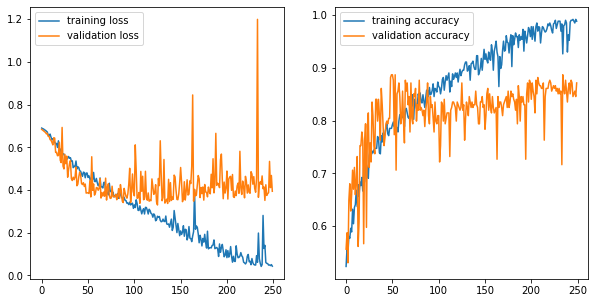

In [16]:
# visualizing loss and accuracy per epoch
baseline_train_loss = baseline_history.history['loss']
baseline_train_acc = baseline_history.history['acc']
baseline_val_loss = baseline_history.history['val_loss']
baseline_val_acc = baseline_history.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(x=baseline_history.epoch, y=baseline_train_loss, ax=ax1, label='training loss')
sns.lineplot(x=baseline_history.epoch, y=baseline_train_acc, ax=ax2, label='training accuracy')

sns.lineplot(x=baseline_history.epoch, y=baseline_val_loss, ax=ax1, label='validation loss')
sns.lineplot(x=baseline_history.epoch, y=baseline_val_acc, ax=ax2, label='validation accuracy');

# Testing Data

In [17]:
test_generator = ImageDataGenerator(rescale=1./255)

In [18]:
test_data = test_generator.flow_from_directory(test_images_dir,  
                                                     target_size = global_target_size,
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = False,
                                                    seed = 42)

Found 239 images belonging to 2 classes.


In [19]:
test_score =  model18.evaluate(test_data)
test_score

8/8 [==============================] - 10s 1s/step - loss: 1.0596 - acc: 0.7113


[1.0596154928207397, 0.7112970948219299]

In [20]:
baseline_score =  baseline.evaluate(test_data)
baseline_score

8/8 [==============================] - 8s 952ms/step - loss: 1.5755 - acc: 0.6987


[1.5754756927490234, 0.6987447738647461]